# **Import Libraries**

In [ ]:
!pip install tf-keras==2.18.0 mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 9.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 6.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 59.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import tensorflow as tf
import tf_keras as keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
from zipfile import ZipFile
import os
import time

E0000 00:00:1751205717.589291      10 common_lib.cc:612] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:230


In [ ]:
if len(tf.config.list_logical_devices('TPU')) > 0 :
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='local')
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
elif len(tf.config.list_logical_devices('GPU')) > 0 :
    gpus = tf.config.list_logical_devices('GPU')
    strategy = tf.distribute.MirroredStrategy(gpus)
else :
    pass

I0000 00:00:1751205738.141904      10 service.cc:148] XLA service 0x5812c2cd6770 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751205738.141947      10 service.cc:156]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1751205738.141952      10 service.cc:156]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1751205738.141955      10 service.cc:156]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1751205738.141958      10 service.cc:156]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1751205738.141960      10 service.cc:156]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1751205738.141963      10 service.cc:156]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1751205738.141966      10 service.cc:156]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1751205738.141969      10 service.cc:156]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


In [ ]:
BATCH_SIZE = 16
BUFFER_SIZE = 1000
IMAGE_SIZE = (256, 192)

# **Import Data**

In [ ]:
train_agnostic_parse = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/image-parse-agnostic-v3.2',
                                                                   labels=None,
                                                                   image_size=IMAGE_SIZE,
                                                                   batch_size=None,
                                                                   shuffle=False,
                                                                   subset='training',
                                                                   validation_split=0.12
                                                                  )
val_agnostic_parse = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/image-parse-agnostic-v3.2',
                                                                 labels=None,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=None,
                                                                 shuffle=False,
                                                                 subset='validation',
                                                                 validation_split=0.12
                                                                )
test_agnostic_parse = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/test/image-parse-agnostic-v3.2',
                                                                  labels=None,
                                                                  image_size=IMAGE_SIZE,
                                                                  batch_size=None,
                                                                  shuffle=False)

Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.


In [ ]:
train_images = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/image',
                                                           labels=None,
                                                           image_size=IMAGE_SIZE,
                                                           batch_size=None,
                                                           shuffle=False,
                                                           subset='training',
                                                           validation_split=0.12
                                                          ).map(lambda x: x / 255.0)
val_images = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/image',
                                                         labels=None,
                                                         image_size=IMAGE_SIZE,
                                                         batch_size=None,
                                                         shuffle=False,
                                                         subset='validation',
                                                         validation_split=0.12
                                                        ).map(lambda x: x / 255.0)
test_images = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/test/image',
                                                          labels=None,
                                                          image_size=IMAGE_SIZE,
                                                          batch_size=None,
                                                          shuffle=False).map(lambda x: x / 255.0)

Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.


# **Data Preprocessing**

## **Get Labels**

In [ ]:
AGNOSTIC_CLASS_DICT = {
    (0, 0, 0): 0, # Background
    (0, 0, 254): 1, # Face
    (0, 85, 85): 2, # Pants
    (0, 128, 0): 2, # Skirt, akan disamakan dengan pants sebagai lower-body garment
    (0, 254, 254): 3, # Right hand
    (51, 169, 220): 4, # Left hand
    (169, 254, 85): 5, # Right thigh
    (85, 254, 169): 6, # Left thigh
    (254, 0, 0): 7 # Hair
}

In [ ]:
def one_hot_segmentation(image, class_dict) :
    label_map = tf.reduce_mean(tf.zeros_like(image, dtype=tf.int32), axis=-1)
    for pixel, class_ in class_dict.items() :
        label_map = tf.where(tf.reduce_all(tf.equal(image, tf.constant(pixel, dtype=tf.float32)), axis=-1),
                             tf.cast(class_, dtype=tf.int32), label_map)
    label_map = tf.one_hot(label_map, depth=len(np.unique(list(class_dict.values()))))
    return tf.cast(label_map, tf.float32)

In [ ]:
train_agnostic_parse = train_agnostic_parse.map(lambda x: one_hot_segmentation(x, AGNOSTIC_CLASS_DICT))
val_agnostic_parse = val_agnostic_parse.map(lambda x: one_hot_segmentation(x, AGNOSTIC_CLASS_DICT))
test_agnostic_parse = test_agnostic_parse.map(lambda x: one_hot_segmentation(x, AGNOSTIC_CLASS_DICT))

In [ ]:
del AGNOSTIC_CLASS_DICT[(0, 128, 0)]

## **MediaPipe Segmentation and Pose Skeleton**

In [ ]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [ ]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(image_size, detection_result, image=None):
    pose_landmarks_list = detection_result.pose_landmarks
    if image is None :
        canvas = np.zeros(image_size)
    else :
        canvas = np.copy(image)

    # Loop through the detected poses to visualize.
    for idx in range(len(pose_landmarks_list)):
        pose_landmarks = pose_landmarks_list[idx]

        # Draw the pose landmarks.
        pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        pose_landmarks_proto.landmark.extend([
          landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
        ])
        solutions.drawing_utils.draw_landmarks(
          canvas,
          pose_landmarks_proto,
          solutions.pose.POSE_CONNECTIONS,
          solutions.drawing_styles.get_default_pose_landmarks_style())
    return canvas

In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

I0000 00:00:1751205795.630432      10 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1751205795.732189    2050 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751205795.904653    2050 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [ ]:
def get_mediapipe_skeleton(tensor) :
    def process(input_) :
        input_int = (input_.numpy() * 255).astype(np.uint8)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=input_int)
        detection_result = detector.detect(mp_image)
        landmark = draw_landmarks_on_image(input_int.shape, detection_result)
        landmark = np.expand_dims(np.mean(landmark, axis=-1), axis=-1)
        return tf.cast(landmark / 255, dtype=tf.float32)
    return tf.py_function(process, [tensor], tf.float32)

In [ ]:
train_skeleton = train_images.map(get_mediapipe_skeleton).map(lambda x: tf.ensure_shape(x, [*IMAGE_SIZE, 1]))
val_skeleton = val_images.map(get_mediapipe_skeleton).map(lambda x: tf.ensure_shape(x, [*IMAGE_SIZE, 1]))
test_skeleton = test_images.map(get_mediapipe_skeleton).map(lambda x: tf.ensure_shape(x, [*IMAGE_SIZE, 1]))

In [ ]:
train_inputs = tf.data.Dataset.zip(tf.data.Dataset.zip(train_images,
                                                       train_skeleton
                                                      ),
                                   train_agnostic_parse
                                  ).cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat().prefetch(tf.data.AUTOTUNE)

val_inputs = tf.data.Dataset.zip(tf.data.Dataset.zip(val_images,
                                                     val_skeleton
                                                    ),
                                 val_agnostic_parse
                                ).cache().batch(BATCH_SIZE).repeat().prefetch(tf.data.AUTOTUNE)
test_inputs = tf.data.Dataset.zip(tf.data.Dataset.zip(test_images,
                                                      test_skeleton
                                                     ),
                                  test_agnostic_parse
                                 ).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# **Modelling**

In [ ]:
def UNet(input_shape,
         inputs=None,
         initial_filter=64,
         min_latent_dim=4,
         output_channel=3,
         output_activation='relu',
         encoder_conv_num=1,
         bottleneck_conv_num=3,
         bottleneck_filter_num=512,
         decoder_conv_num=1,
         use_upsample=True,
         use_pooling=True,
         use_instance_norm=False,
         use_leaky_relu=False,
         show_summary=True,
         model_name="attention_unet"
        ) :
    block_outputs = []
    block_filters = []
    min_dim = min(input_shape[:2])

    if inputs is None :
        input_layer = keras.Input(shape=input_shape)
    else :
        input_layer = keras.layers.Concatenate(name='concat_inputs')(inputs)

    # Encoder
    counter = 0
    factor = 1
    prev_layer = input_layer

    while min_dim >= min_latent_dim :
        if len(block_outputs) > 0 :
            if use_pooling :
                downsample = keras.layers.MaxPooling2D(pool_size=(2,2))(block_outputs[-1])
            else :
                downsample = keras.layers.Conv2D(filters=initial_filter*factor,
                                                 kernel_size=(3, 3),
                                                 strides=2,
                                                 padding='same')(block_outputs[-1])
            prev_layer = downsample

        if counter == 2 :
            factor *= 2
            counter = 0

        for i in range(encoder_conv_num) :
            conv = keras.layers.Conv2D(filters=initial_filter*factor,
                                       kernel_size=(3, 3),
                                       padding='same')(prev_layer)
            if not use_instance_norm :
                norm = keras.layers.BatchNormalization()(conv)
            else :
                norm = keras.layers.GroupNormalization(groups=-1)(conv)

            if not use_leaky_relu :
                relu = keras.layers.ReLU()(norm)
            else :
                relu = keras.layers.LeakyReLU()(norm)
            prev_layer = relu

        block_outputs.append(relu)
        block_filters.append(initial_filter*factor)

        counter += 1
        if min_dim % 2 == 0 :
            min_dim /= 2
        else :
            break

    # Bottleneck
    for _ in range(bottleneck_conv_num) :

        conv = keras.layers.Conv2D(filters=bottleneck_filter_num,
                                   kernel_size=(3, 3),
                                   padding='same')(prev_layer)
        if not use_instance_norm :
            norm = keras.layers.BatchNormalization()(conv)
        else :
            norm = keras.layers.GroupNormalization(groups=-1)(conv)

        if not use_leaky_relu :
            relu = keras.layers.ReLU()(norm)
        else :
            relu = keras.layers.LeakyReLU()(norm)
        prev_layer = relu

    # Decoder
    output_idx = len(block_outputs) - 1
    counter = 0
    if factor > 1 :
        factor /= 2

    while output_idx > 0 :
        if not use_upsample :
            upsize_layer = keras.layers.Conv2DTranspose(filters=block_filters[output_idx-1],
                                                        kernel_size=(2, 2),
                                                        strides=2)(prev_layer)
        else :
            upsize_layer = keras.layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(prev_layer)

        if not use_instance_norm :
            norm = keras.layers.BatchNormalization()(upsize_layer)
        else :
            norm = keras.layers.GroupNormalization(groups=-1)(upsize_layer)

        if not use_leaky_relu :
            relu = keras.layers.ReLU()(norm)
        else :
            relu = keras.layers.LeakyReLU()(norm)

        # Attention block
        conv_w_encoder = keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                               kernel_size=(1, 1),
                                               padding='same')(block_outputs[output_idx-1])
        if not use_instance_norm :
            norm_w_encoder = keras.layers.BatchNormalization()(conv_w_encoder)
        else :
            norm_w_encoder = keras.layers.GroupNormalization(groups=-1)(conv_w_encoder)

        conv_w_decoder = keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                               kernel_size=(1, 1),
                                               padding='same')(relu)

        if not use_instance_norm :
            norm_w_decoder = keras.layers.BatchNormalization()(conv_w_decoder)
        else :
            norm_w_decoder = keras.layers.GroupNormalization(groups=-1)(conv_w_decoder)

        w_add = keras.layers.Add()([norm_w_encoder, norm_w_decoder])

        if not use_leaky_relu :
            w_relu = keras.layers.ReLU()(w_add)
        else :
            w_relu = keras.layers.LeakyReLU()(w_add)

        w_output = keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                       kernel_size=(1, 1),
                                       padding='same',
                                       activation='sigmoid')(w_relu)
        att_output = keras.layers.Multiply()([w_output, block_outputs[output_idx-1]])

        # Concatenate
        concat = keras.layers.Concatenate()([relu, att_output])
        prev_layer = concat

        for _ in range(decoder_conv_num) :
            conv = keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                       kernel_size=(3, 3),
                                       padding='same')(prev_layer)
            if not use_instance_norm :
                norm = keras.layers.BatchNormalization()(conv)
            else :
                norm = keras.layers.GroupNormalization(groups=-1)(conv)

            if not use_leaky_relu :
                relu = keras.layers.ReLU()(norm)
            else :
                relu = keras.layers.LeakyReLU()(norm)
            prev_layer = relu

        output_idx -= 1

    output = keras.layers.Conv2D(filters=output_channel,
                                 kernel_size=(1, 1),
                                 activation=output_activation,
                                 padding='same')(prev_layer)

    if inputs is None :
        model = keras.Model(inputs=input_layer, outputs=output, name=model_name)
    else :
        model = keras.Model(inputs=inputs, outputs=output, name=model_name)

    if show_summary :
        model.summary()

    return model

In [ ]:
with strategy.scope() :
    person_input = keras.Input(shape=(*IMAGE_SIZE, 3))
    skeleton_input = keras.Input(shape=(*IMAGE_SIZE, 1))

    random_brightness = keras.layers.RandomBrightness(0.3, (0.0, 1.0))(person_input)
    random_contrast = keras.layers.RandomContrast(0.3)(random_brightness)
    random_noise = keras.layers.GaussianNoise(0.05)(random_contrast)

    augmentation_model = keras.Model(inputs=[person_input, skeleton_input],
                                     outputs=[random_noise, skeleton_input]
                                    )

    seg_model = UNet(input_shape=(*IMAGE_SIZE, 4),
                     inputs=[random_noise, skeleton_input],
                     encoder_conv_num=3,
                     decoder_conv_num=3,
                     output_channel=len(AGNOSTIC_CLASS_DICT),
                     output_activation='softmax',
                     use_leaky_relu=True,
                     use_instance_norm=True,
                     show_summary=False
                )

    output = seg_model(augmentation_model.output)
    model = keras.Model(inputs=augmentation_model.input, outputs=output)

    model.compile(optimizer=keras.optimizers.Adam(5e-4),
                  loss=keras.losses.CategoricalCrossentropy(),
                  metrics=[keras.metrics.OneHotMeanIoU(num_classes=len(AGNOSTIC_CLASS_DICT))]
                 )

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 192, 3)]        0         []                            
                                                                                                  
 random_brightness (RandomB  (None, 256, 192, 3)          0         ['input_1[0][0]']             
 rightness)                                                                                       
                                                                                                  
 random_contrast (RandomCon  (None, 256, 192, 3)          0         ['random_brightness[0][0]']   
 trast)                                                                                           
                                                                                            

# **Training**

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('agnostic_segmentation.h5',
                                             monitor='val_one_hot_mean_io_u',
                                             save_best_only=True,
                                             mode='max',
                                             verbose=1)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_one_hot_mean_io_u',
                                              mode='max',
                                              factor=0.8,
                                              patience=3)

In [ ]:
STEPS_PER_EPOCH = int(np.ceil(10250 / BATCH_SIZE))
VALIDATION_STEPS = int(np.ceil(1397 / BATCH_SIZE))

history = model.fit(train_inputs,
                    epochs=50,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    validation_steps=VALIDATION_STEPS,
                    validation_data=val_inputs,
                    callbacks=[checkpoint, reduce_lr])

Epoch 1/50


I0000 00:00:1751187819.569089      10 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:16047731660159054077
E0000 00:00:1751187822.011953      10 meta_optimizer.cc:966] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
I0000 00:00:1751187825.496310     947 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(10228477156848614647), session_name()
I0000 00:00:1751187865.925652     947 tpu_compile_op_common.cc:245] Compilation of 10228477156848614647 with session name  took 40.429279732s and succeeded
I0000 00:00:1751187865.988680     947 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(10228477156848614647), session_name(), subgraph_key(std::string(property.function_name) = "cluster_train_function_16047731660159054077", property.function_library_fingerprint = 9854020026812085342, property.mlir_module_fingerprint = 0, property.num_replicas =

641/641 [==============================] - ETA: 0s - loss: 0.1660 - one_hot_mean_io_u: 0.5628

I0000 00:00:1751187957.208399      10 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:5154711742611122764
E0000 00:00:1751187957.773193      10 meta_optimizer.cc:966] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
I0000 00:00:1751187958.781617     944 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(5125091828821402008), session_name()
I0000 00:00:1751187978.103144     944 tpu_compile_op_common.cc:245] Compilation of 5125091828821402008 with session name  took 19.321448573s and succeeded
I0000 00:00:1751187978.121180     944 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(5125091828821402008), session_name(), subgraph_key(std::string(property.function_name) = "cluster_test_function_5154711742611122764", property.function_library_fingerprint = 8158023926623299035, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topolog


Epoch 1: val_one_hot_mean_io_u improved from -inf to 0.65540, saving model to agnostic_segmentation.h5
641/641 [==============================] - 203s 188ms/step - loss: 0.1660 - one_hot_mean_io_u: 0.5628 - val_loss: 0.0813 - val_one_hot_mean_io_u: 0.6554 - lr: 5.0000e-04
Epoch 2/50
641/641 [==============================] - ETA: 0s - loss: 0.0669 - one_hot_mean_io_u: 0.7383
Epoch 2: val_one_hot_mean_io_u improved from 0.65540 to 0.69744, saving model to agnostic_segmentation.h5
641/641 [==============================] - 94s 147ms/step - loss: 0.0669 - one_hot_mean_io_u: 0.7383 - val_loss: 0.0625 - val_one_hot_mean_io_u: 0.6974 - lr: 5.0000e-04
Epoch 3/50
641/641 [==============================] - ETA: 0s - loss: 0.0540 - one_hot_mean_io_u: 0.7884
Epoch 3: val_one_hot_mean_io_u improved from 0.69744 to 0.82260, saving model to agnostic_segmentation.h5
641/641 [==============================] - 94s 146ms/step - loss: 0.0540 - one_hot_mean_io_u: 0.7884 - val_loss: 0.0526 - val_one_hot_m

# **Evaluation**

## Training Process

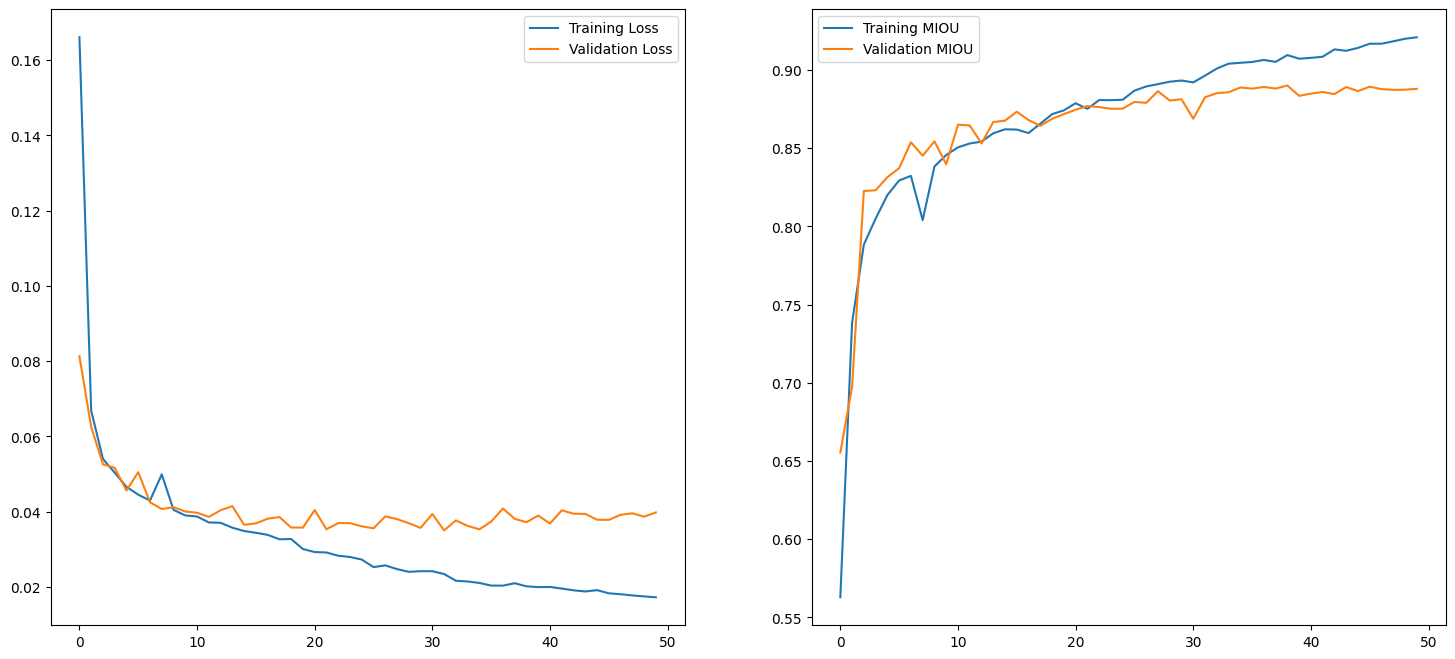

In [ ]:
plt.subplots(1, 2, figsize=(18, 8))

plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['one_hot_mean_io_u'], label='Training MIOU')
plt.plot(history.history['val_one_hot_mean_io_u'], label='Validation MIOU')
plt.legend()

plt.show()

## Performance with Testing Set

In [ ]:
with strategy.scope() :
    model = keras.models.load_model('agnostic_segmentation.h5')

In [ ]:
model.evaluate(test_inputs)

I0000 00:00:1751205930.594293      10 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:7870092071263567952
E0000 00:00:1751205931.158867      10 meta_optimizer.cc:966] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
I0000 00:00:1751205933.865037     972 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(12806051118613021405), session_name()
I0000 00:00:1751205955.452004     972 tpu_compile_op_common.cc:245] Compilation of 12806051118613021405 with session name  took 21.586916625s and succeeded
I0000 00:00:1751205955.469350     972 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(12806051118613021405), session_name(), subgraph_key(std::string(property.function_name) = "cluster_test_function_7870092071263567952", property.function_library_fingerprint = 5884026632670720738, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topo

127/127 [==============================] - 199s 1s/step - loss: 0.0322 - one_hot_mean_io_u: 0.8927


[0.032246410846710205, 0.8927177786827087]

In [ ]:
def agnostic_segmentation_inference(pred) :
    pred = np.argmax(pred, axis=-1)
    class_arr = np.array([pixel for pixel in AGNOSTIC_CLASS_DICT.keys()])
    return class_arr[pred]

W0000 00:00:1751205830.676233    2070 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


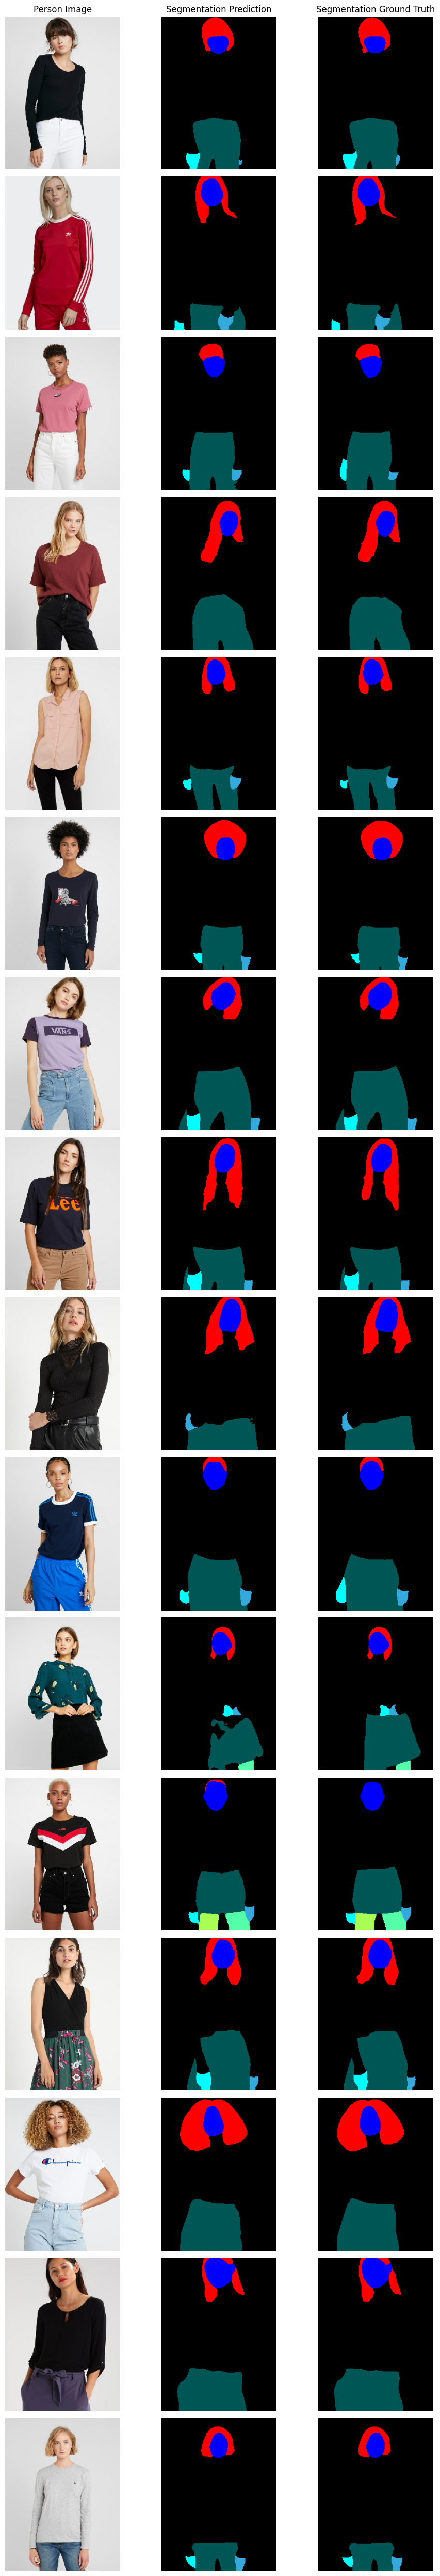

In [ ]:
sample = test_inputs.take(1).as_numpy_iterator().next()
preds = agnostic_segmentation_inference(model(sample[0]))
images = sample[0][0]
ground_truths = agnostic_segmentation_inference(sample[1])

plot_images = [images, preds, ground_truths]

titles = ["Person Image", "Segmentation Prediction", "Segmentation Ground Truth"]

plt.subplots(16, 3, figsize=(10, 50), sharex=True)
for i in range(0, 48, 3) :
    for j in range(1, 4) :

        plt.subplot(16, 3, i+j)
        plt.imshow(plot_images[j-1][i//3, :, :, :])
        plt.axis(False)
        if i == 0 :
            plt.title(titles[j-1])

plt.tight_layout(pad=1)
plt.axis(False)
plt.show()